In [2]:
import idx2numpy
import cv2
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
np.set_printoptions(threshold=np.inf)
# vehicle verify --specification test.vcl --network classifier:models/model.onnx --dataset images:dataset/images.idx --dataset labels:dataset/labels.idx --verifier Marabou

2025-03-20 12:33:30.716526: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742474010.841632    6725 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742474010.877282    6725 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-20 12:33:31.237165: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
PATH = Path("dataset") / "GTSRB" / "Training"
_N = 32
def convert_dataset():
    total = []
    labels = []
    for path,_,files in os.walk(PATH):        
        for file in files:
            if file.endswith(".png"):
                label = int(os.path.basename(path))
                file_path = Path(path) / file
                img = cv2.imread(file_path)
                img = tf.image.resize(img,(_N,_N))
                
                img = tf.image.rgb_to_grayscale(img).numpy()
                
                img /= 255.0
                total  += [img]
                labels += [label]
    return total, labels
_images, _labels = convert_dataset()

I0000 00:00:1740057744.049724   28284 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5564 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:09:00.0, compute capability: 8.6


In [3]:
images = np.array(_images,dtype=np.float64)
labels = np.array(_labels,dtype=np.uint8)


In [4]:
print(labels.shape)
print(images.shape)

(39209,)
(39209, 32, 32, 1)


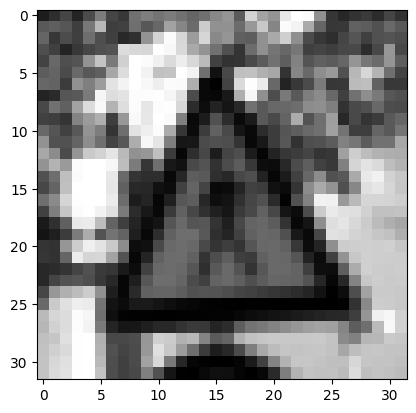

In [5]:
plt.imshow(images[100],cmap="gray")

In [6]:
images.shape[:3]

(39209, 32, 32)

In [7]:
def write_idx(imgs,labels,n):
    imgs = imgs.reshape(imgs.shape[:3])
    frequency = np.zeros(shape=43)
    save_imgs = np.zeros((n*43,_N,_N),dtype=np.float64)
    save_labels = np.zeros(n*43,dtype=np.uint8)
    counter = 0
    for img,label in zip(imgs,labels):
        if frequency[label] >= n:
            continue
        frequency[label] += 1
        save_imgs[counter] = img
        save_labels[counter] = label
        counter += 1

    path = Path("dataset") 
    
    idx2numpy.convert_to_file(str(path / "images.idx"),save_imgs)
    idx2numpy.convert_to_file(str(path / "labels.idx"),save_labels)
write_idx(images,labels,1)

(43, 32, 32)
>f8
(43,)
uint8
[27 13  4  7 30 39 35  5 18 16 20  8 34  9 10 36 26 19 15 40  6 32 12 42
 14 21  2 37  3 17 29 24 41 23 22 33 31 25  1 28 11 38  0]


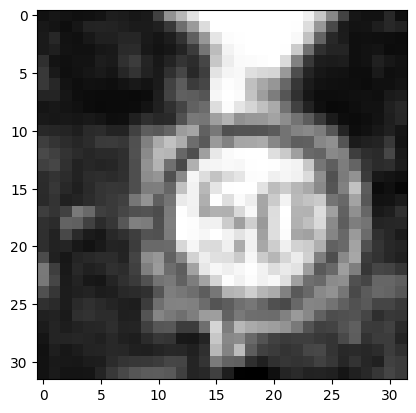

In [3]:
def func():
    # Reading
    path = Path("dataset")
     
    ndarr = idx2numpy.convert_from_file(str(path / "images.idx"))
    print(ndarr.shape)
    print(ndarr.dtype)
    plt.imshow(ndarr[26],cmap="gray") # 20 30 50 60
    ndarr = idx2numpy.convert_from_file(str(path / "labels.idx"))
    print(ndarr.shape)
    print(ndarr.dtype)
    print(ndarr)
func()